In [15]:
# Project goal: to find trends in life expectancy at birth between different countries and how that corresponds with GDP


In [178]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df=pd.read_csv('all_data.csv')
df2 = df.rename(columns={'Country': 'country', 'Year':'year', 'Life expectancy at birth (years)': 'life_expectancy', 'GDP':'gdp'})

In [179]:
df2['country'] = df2['country'].str.replace('United States of America','USA')


print(df2.head(80))

   country  year  life_expectancy           gdp
0    Chile  2000             77.3  7.786093e+10
1    Chile  2001             77.3  7.097992e+10
2    Chile  2002             77.8  6.973681e+10
3    Chile  2003             77.9  7.564346e+10
4    Chile  2004             78.0  9.921039e+10
..     ...   ...              ...           ...
75     USA  2011             78.7  1.550000e+13
76     USA  2012             78.8  1.620000e+13
77     USA  2013             78.9  1.670000e+13
78     USA  2014             79.1  1.740000e+13
79     USA  2015             79.3  1.810000e+13

[80 rows x 4 columns]


In [64]:
print(df2.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   country          96 non-null     object 
 1   year             96 non-null     int64  
 2   life_expectancy  96 non-null     float64
 3   gdp              96 non-null     float64
dtypes: float64(2), int64(1), object(1)
memory usage: 3.1+ KB
None


In [72]:
unique_countries= df2.country.unique()
unique_years= df2.year.unique()

print(unique_countries)
print(unique_years)


['Chile' 'China' 'Germany' 'Mexico' 'USA' 'Zimbabwe']
[2000 2001 2002 2003 2004 2005 2006 2007 2008 2009 2010 2011 2012 2013
 2014 2015]


In [7]:
#After looking through the data, we will be examining the relationship between GDP and life expectancy for the following countries:
#Chile, China, Germany, Mexico, USA, and Zimbabwe.

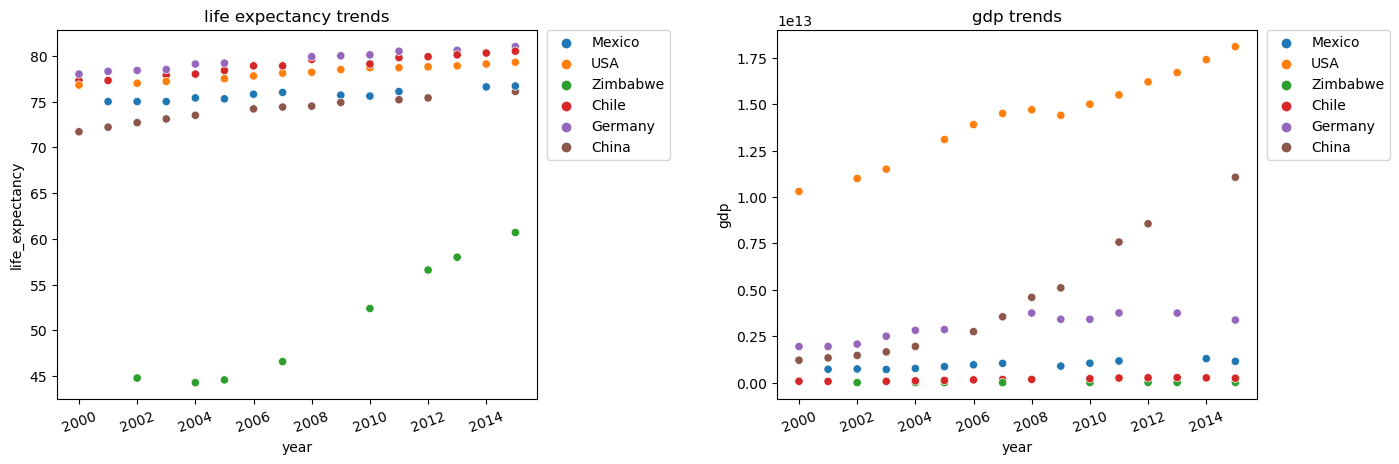

In [176]:
perc=0.75
df2_sub=df2.sample(n=int(df2.shape[0]*perc))

plt.subplot(1,2,1)
sns.scatterplot(x=df2_sub['year'], y=df2_sub['life_expectancy'], hue=df2_sub['country'], data= df2)
plt.subplots_adjust(right=2)
plt.xticks(rotation=20)
plt.title('life expectancy trends')
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
plt.subplot(1,2,2)
sns.scatterplot(x=df2_sub['year'], y=df2_sub['gdp'], hue=df2_sub['country'], data= df2)
plt.xticks(rotation=20)
plt.title('gdp trends')
plt.subplots_adjust(wspace=.5)
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
plt.show()
plt.show()

In [180]:
#From the data in the first figures, it appears that GDP has some correlation with life expectancy at birth in some countries, but not all.
#When there is correlation, it appears to be fairly weak based on these graphs. 

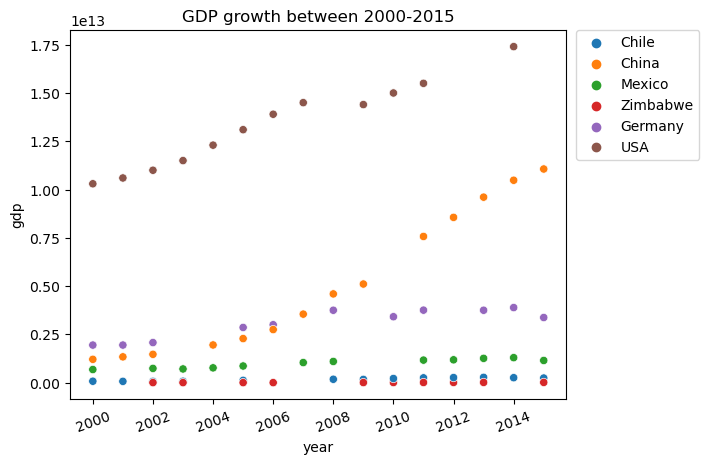

In [112]:
perc=0.75
df2_sub=df2.sample(n=int(df2.shape[0]*perc))

sns.scatterplot(x=df2_sub['year'], y=df2_sub['gdp'], hue=df2_sub['country'], data= df2)
plt.xticks(rotation=20)
plt.title('GDP growth between 2000-2015')
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
plt.show()

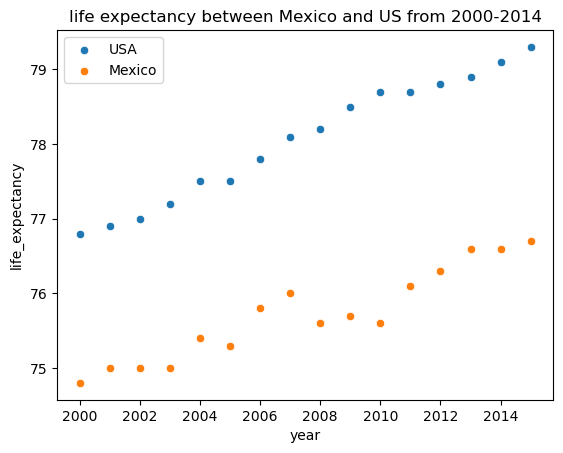

In [111]:
#Extract US and Mexico data to compare life expectancy

USdf= df2[df2.country=='USA']
MXdf=df2[df2.country=='Mexico']
sns.scatterplot(x=USdf['year'], y=USdf['life_expectancy'])
sns.scatterplot(x=MXdf['year'], y=MXdf['life_expectancy'])
plt.title('life expectancy between Mexico and US from 2000-2014')
plt.legend(['USA', 'Mexico'])
plt.show()

In [ ]:
#The line graph above shows more variability for GDP in Mexico than in the US. This is further explored in the graph below.

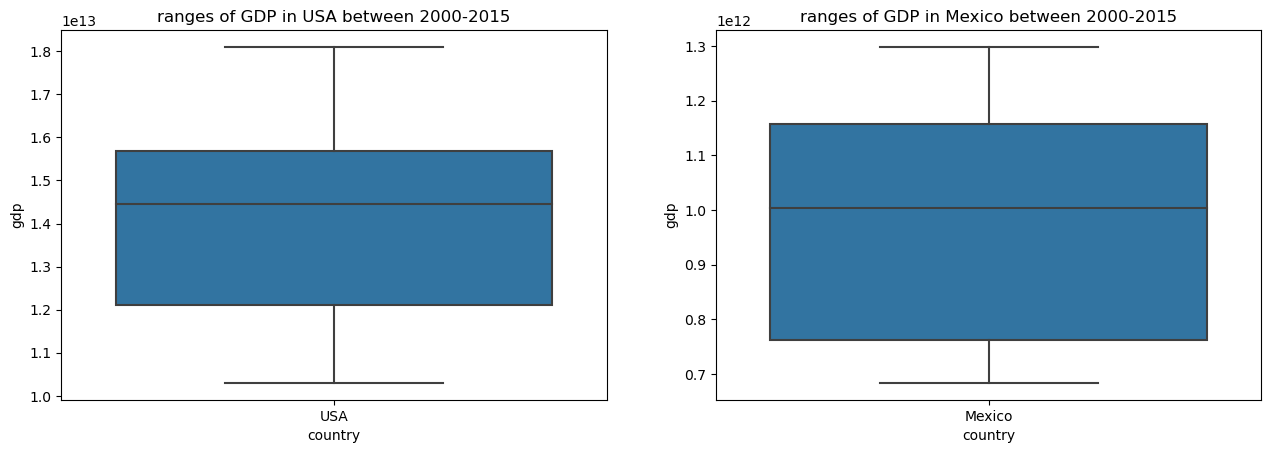

In [129]:
#Compare ranges of GDP in USA and Mexico between 2000-2015
USdf= df2[df2.country=='USA']
MXdf=df2[df2.country=='Mexico']
plt.subplot(1,2,1)
sns.boxplot(x=USdf['country'], y=USdf['gdp'])
plt.title('ranges of GDP in USA between 2000-2015')
plt.subplot(1,2,2)
sns.boxplot(x=MXdf['country'],y=MXdf['gdp'])
plt.subplots_adjust(right=2)
plt.title('ranges of GDP in Mexico between 2000-2015')
plt.show()

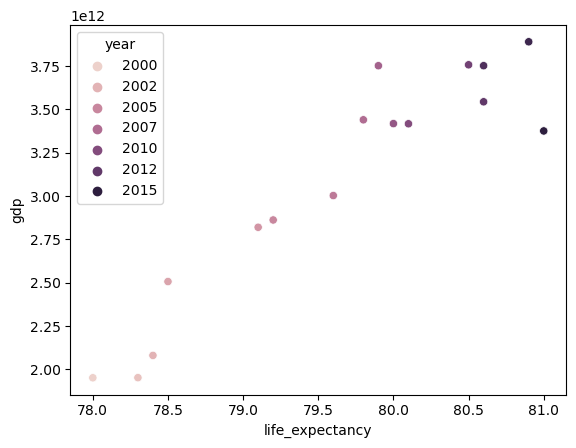

In [187]:
#life expectancy in Germany vs. GDP between 2000-2014

Germanydf= df2[df2.country=='Germany']

sns.scatterplot(x=Germanydf['life_expectancy'], y= Germanydf['gdp'], hue=Germanydf['year'])
sns.color_palette('colorblind')
plt.show()

In [ ]:
#This graph shows despite the variability of GDP between 2000-2015, the life expectancy at birth continued to increase.

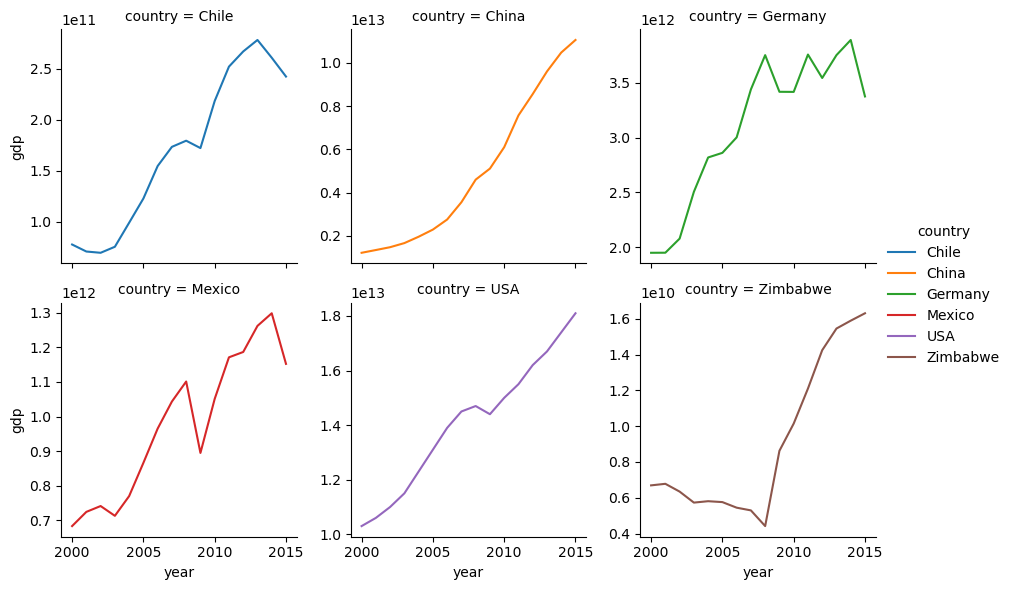

In [160]:
#GDP overtime

graph2= sns.FacetGrid(df2, col='country', col_wrap=3, hue='country', sharey=False)

graph2= (graph2.map(sns.lineplot, 'year', 'gdp').add_legend())

In [ ]:
#This graph shows the variability of GDP between 2000-2015. Of note, each country appears to have a decrease in GDP between 2000 and 2015, except for China. Please note the exponent that each gdp is relating to.